## The XGBOOST Model


In case you are interessted in machine learning, here are some good sources: 

- [Bias and Variance](https://www.youtube.com/watch?v=EuBBz3bI-aA&list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF&index=5)
- [Decision Trees](https://www.youtube.com/watch?v=7VeUPuFGJHk&list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF&index=34)
- [Regression Trees](https://www.youtube.com/watch?v=g9c66TUylZ4&list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF&index=36)
- [Random Forest / parallel ensemble learning](https://www.youtube.com/watch?v=EuBBz3bI-aA&list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF&index=5)
- [Adaptive Boosting / sequential ensemble learning](https://www.youtube.com/watch?v=LsK-xG1cLYA&list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF&index=43)
- [Gradient Boosting / sequential ensemble learning](https://www.youtube.com/watch?v=3CC4N4z3GJc&list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF&index=44)
- [Extreme gradient boosting](https://www.youtube.com/watch?v=OtD8wVaFm6E&list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF&index=54)
- [Deep Learning/Neural Networks vs Machine Learning](https://towardsdatascience.com/predicting-airbnb-prices-with-machine-learning-and-deep-learning-f46d44afb8a6
)
- Hypertuning a xgboost-model


In [2]:
# import all the moduls
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score

In [3]:
# Import all important Modules
%matplotlib inline
import time
import pandas as pd
import matplotlib.pyplot as plt
import os
from collections import Counter
import geopandas as gpd
import numpy as np
import seaborn as sns


Import Dataset as Pandaframe an set Index to 'id'

In [5]:
df = pd.read_csv('listings_model.csv', index_col =0)
df.head()

,host_is_superhost,host_listings_count,host_identity_verified,accommodates,bathrooms,price,security_deposit,cleaning_fee,extra_people,minimum_nights,...,time_since_first_review_4+ years,time_since_first_review_6-12 months,time_since_last_review_0-2 weeks,time_since_last_review_1+ year,time_since_last_review_2-6 months,time_since_last_review_2-8 weeks,time_since_last_review_6-12 months,Score_Amenities,Score_Sights,Score_Parks
id,,,,,,,,,,,,,,,,,,,,,
2015,1.0,1.386294,1.0,1.098612,0.0,4.094345,5.298317,3.401197,3.332205,1.386294,...,0,0,0,0,0,0,0,2.011,10.177,1.111199
2695,0.0,0.000000,1.0,0.693147,0.0,2.833213,-4.605170,-4.605170,-4.605170,0.693147,...,0,0,0,0,0,0,0,3.212,14.514,1.491105
3176,0.0,0.000000,1.0,1.386294,0.0,4.499810,5.298317,3.912023,2.995732,4.127134,...,1,0,0,1,0,0,0,0.626,11.891,0.753301
3309,0.0,0.000000,1.0,0.693147,0.0,3.258097,5.521461,3.401197,2.890372,1.609438,...,1,0,0,0,0,0,0,2.454,10.662,1.144223
7071,1.0,0.000000,1.0,0.693147,0.0,3.737670,-4.605170,-4.605170,3.178054,0.693147,...,1,0,0,0,0,0,0,0.993,10.348,-1.269401


Splitt Dataset into Training and Testing and randomize them

In [6]:
X = df.drop('price', axis=1)
y = df.price

In [7]:
# Scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))

In [8]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [9]:
xgb_reg_start = time.time()

xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
training_preds_xgb_reg = xgb_reg.predict(X_train)
val_preds_xgb_reg = xgb_reg.predict(X_test)

xgb_reg_end = time.time()

print(f"Time taken to run: {round((xgb_reg_end - xgb_reg_start)/60,1)} minutes")
print("\nTraining MSE:", round(mean_squared_error(y_train, training_preds_xgb_reg),4))
print("Validation MSE:", round(mean_squared_error(y_test, val_preds_xgb_reg),4))
print("\nTraining r2:", round(r2_score(y_train, training_preds_xgb_reg),4))
print("Validation r2:", round(r2_score(y_test, val_preds_xgb_reg),4))

/anaconda3/envs/AirBnB/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:34:51] WARNING: /usr/local/miniconda/conda-bld/xgboost_1566327371504/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Time taken to run: 0.2 minutes

Training MSE: 0.1444
Validation MSE: 0.142

Training r2: 0.6384
Validation r2: 0.6081


In [10]:
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)
ft_weights_xgb_reg

,weight
neighbourhood_group_cleansed_Steglitz - Zehlendorf,0.000000
host_greeting,0.000000
review_scores_communication_0-8/10,0.000000
property_type_House,0.000000
review_scores_checkin_9/10,0.000000
...,...
availability_90,0.028845
cleaning_fee,0.036348
accommodates,0.053793
bathrooms,0.055664


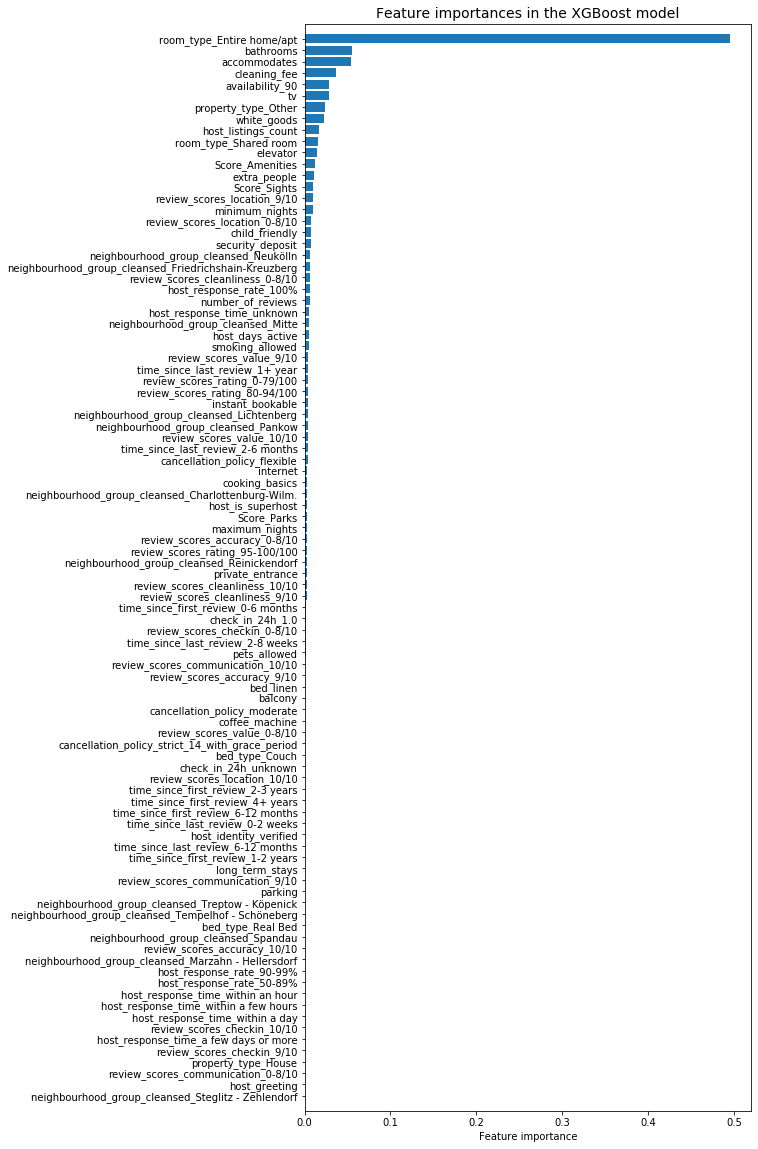

In [11]:
# Plotting feature importances
plt.figure(figsize=(8,20))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()